<a href="https://colab.research.google.com/github/YoshB/Neural_Clasifier/blob/main/Clasifier_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mtpimage

from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn import metrics 


In [2]:
#The cifar10 library give us a dataset of images in 10 different categories as airplane, ship, and others.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print(x_train.shape)

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
# We are going to make a network that can identify a ship and an airplane
airplane = (y_train == 0).ravel()
ship = (y_train == 8).ravel()

x_train = np.concatenate((x_train[airplane,:,:,:], x_train[ship,:,:,:]))

airplane = (y_test == 0).ravel()
ship = (y_test == 8).ravel()

x_test = np.concatenate((x_test[airplane,:,:,:], x_test[ship,:,:,:]))

y_train = np.ones(10000)
y_train[0:5000] = np.zeros(5000)
I = np.random.permutation(10000)


# print(np.shape(x_train))

x_train = x_train[I,:,:,:]
y_train = y_train[I]


y_test = np.ones(2000)
y_test[0:1000] = np.zeros(1000)
I = np.random.permutation(2000)


x_test = x_test[I,:,:,:]
y_test = y_test[I]



Visualize the images

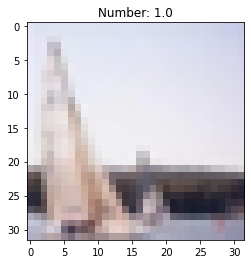

In [4]:
num = np.random.randint(0,10000)
plt.imshow(x_train[num])
plt.title("Number: " + str(y_train[num]))
plt.show()

# 0 --> Avion
# 1 --> Barco

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(x_train.shape[0], 32, 32,3)
x_test = x_test.reshape(x_test.shape[0], 32, 32,3)


Creat the model

In [5]:
model = Sequential()

# Input layer
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation= 'LeakyReLU', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 25% of the neuron in this layer will be turn off randomly to strengthen the network
# this help us to deal with the overfitting
model.add(Dropout(0.25)) 

#Segund layer
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# third
model.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# fourth and last convolution layer
model.add(Conv2D(16, kernel_size=(3,3),padding='same', activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#We create a dense model from here
model.add(Flatten())

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1,activation='sigmoid'))

#Set the algorithm to train our net (Adam, in this case)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
print(y_train.shape)

(10000,)


# Training

In [7]:
batch = 250 # Batch size
print(batch)
e = 50 # Epochs
hist = model.fit(x_train,y_train, batch_size= batch, epochs = e, verbose=1, validation_data=(x_test, y_test))

#We can detect if our model is over fitting if the val_accuracy is less than the accuracy 

250
Epoch 1/50
40/40 [==============================] - 16s 60ms/step - loss: 0.6852 - accuracy: 0.5453 - val_loss: 0.6313 - val_accuracy: 0.6635
Epoch 2/50
40/40 [==============================] - 2s 53ms/step - loss: 0.6268 - accuracy: 0.6629 - val_loss: 0.5645 - val_accuracy: 0.7190
Epoch 3/50
40/40 [==============================] - 2s 52ms/step - loss: 0.5757 - accuracy: 0.7104 - val_loss: 0.5240 - val_accuracy: 0.7535
Epoch 4/50
40/40 [==============================] - 2s 52ms/step - loss: 0.5300 - accuracy: 0.7451 - val_loss: 0.4748 - val_accuracy: 0.7790
Epoch 5/50
40/40 [==============================] - 2s 53ms/step - loss: 0.4800 - accuracy: 0.7784 - val_loss: 0.4155 - val_accuracy: 0.8175
Epoch 6/50
40/40 [==============================] - 2s 53ms/step - loss: 0.4376 - accuracy: 0.8028 - val_loss: 0.3713 - val_accuracy: 0.8355
Epoch 7/50
40/40 [==============================] - 2s 55ms/step - loss: 0.3990 - accuracy: 0.8286 - val_loss: 0.3345 - val_accuracy: 0.8600
Epoch 8/

In [8]:
# Save the model to import it later
model.save('CNN_Model_CIFAR10.h5')

In [9]:
# load an existent model
model = keras.models.load_model('CNN_Model_CIFAR10.h5')

#Graphh results

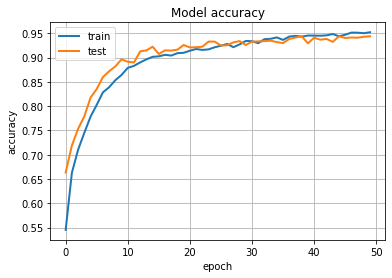

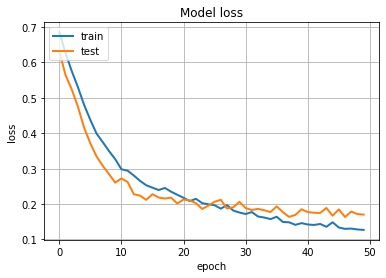

In [10]:
plt.figure(); plt.grid()
plt.plot(hist.history['accuracy'], lw=2)
plt.plot(hist.history['val_accuracy'], lw=2)
plt.xlabel('epoch'); plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.legend(['train', 'test'], loc= 'upper left')

plt.figure(); plt.grid()
plt.plot(hist.history['loss'], lw=2)
plt.plot(hist.history['val_loss'], lw=2)
plt.xlabel('epoch'); plt.ylabel('loss')
plt.title('Model loss')
plt.legend(['train', 'test'], loc= 'upper left')



# Accuracy metrics 

In [11]:
ypred = model.predict(x_test)
ypred = ypred.ravel() > 0.5

#Metrics
print("Metrics: \n", metrics.classification_report(y_test, ypred))

# Confusion matrix to know how many ships and airplanes the model could identify correctly
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, ypred))



Metrics: 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1000
         1.0       0.93      0.95      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Confusion Matrix: 
 [[933  67]
 [ 45 955]]


# Lets evaluate the model with other images

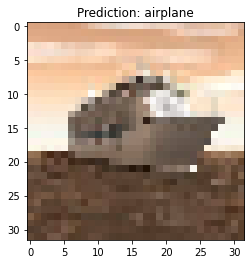

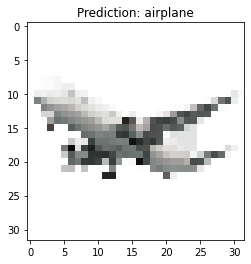

In [13]:
import cv2

ship_name = 'ship.jpg'
airplane_name = 'airplane.jpg'

#Load and resize ship image
ship_img = cv2.imread(ship_name)
ship_img = cv2.resize(ship_img,(32,32))
#Load and resize airplane image
airplane_img = cv2.imread(airplane_name)
airplane_img = cv2.resize(airplane_img,(32,32))

# We want the image in pixels values from 0 to 1 and not from 0 to 255
pattern_ship = ship_img.reshape((1,32,32,3))/255
pattern_airplane = airplane_img.reshape((1,32,32,3))/255

n = model.predict(pattern_ship)
n = n.ravel() > 0.5

plt.imshow(pattern_ship[0,:,:])
if n == 0:
  prediction = "airplane"
else:
  prediction = "ship"


plt.title("Prediction: "+ prediction)
plt.show()

# Now lets try with an airplane
n = model.predict(pattern_airplane)
n = n.ravel() > 0.5

plt.imshow(pattern_airplane[0,:,:])
if n == 0:
  prediction = "airplane"
else:
  prediction = "ship"


plt.title("Prediction: "+ prediction)
plt.show()

# Remember that
# 0 --> plane
# 1 --> ship
